In [1]:
import pandas as pd
import numpy as np

In [3]:
data1=pd.read_csv(r"D:\Black_Friday Project\blackFriday_test.csv")
data1.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
data2=pd.read_csv(r"D:\Black_Friday Project\blackFriday_train.csv")
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data1.shape

(233599, 11)

In [6]:
data2.shape

(550068, 12)

In [7]:
df=pd.concat([data1,data2])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [8]:
df.shape

(783667, 12)

In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [9]:
# there are so many null values lets deal with it

In [13]:
print(df["Gender"].value_counts())

M    590031
F    193636
Name: Gender, dtype: int64


In [14]:
df['Gender']=df['Gender'].fillna('M')

In [16]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [17]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [18]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean())

In [19]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [20]:
# now that we have dealt with null values lets move further

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# computer only understands numeric data so lets encode the object data type columns

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lab_enc=LabelEncoder()

In [25]:
df2=lab_enc.fit_transform(df['Product_ID'])
df['Product_ID']=df2
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,1216,M,46-50,7,B,2,1,1,11.0,12.668605,9263.968713
1,1000009,1063,M,26-35,17,C,0,0,3,5.0,12.668605,9263.968713
2,1000010,2799,F,36-45,1,B,4+,1,5,14.0,12.668605,9263.968713
3,1000010,1379,F,36-45,1,B,4+,1,4,9.0,12.668605,9263.968713
4,1000011,535,F,26-35,1,C,1,0,4,5.0,12.000000,9263.968713


In [26]:
df2=lab_enc.fit_transform(df['Gender'])
df['Gender']=df2
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,1216,1,46-50,7,B,2,1,1,11.0,12.668605,9263.968713
1,1000009,1063,1,26-35,17,C,0,0,3,5.0,12.668605,9263.968713
2,1000010,2799,0,36-45,1,B,4+,1,5,14.0,12.668605,9263.968713
3,1000010,1379,0,36-45,1,B,4+,1,4,9.0,12.668605,9263.968713
4,1000011,535,0,26-35,1,C,1,0,4,5.0,12.000000,9263.968713


In [27]:
df2=lab_enc.fit_transform(df['Age'])
df['Age']=df2
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,1216,1,4,7,B,2,1,1,11.0,12.668605,9263.968713
1,1000009,1063,1,2,17,C,0,0,3,5.0,12.668605,9263.968713
2,1000010,2799,0,3,1,B,4+,1,5,14.0,12.668605,9263.968713
3,1000010,1379,0,3,1,B,4+,1,4,9.0,12.668605,9263.968713
4,1000011,535,0,2,1,C,1,0,4,5.0,12.000000,9263.968713


In [28]:
df2=lab_enc.fit_transform(df['City_Category'])
df['City_Category']=df2
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,1216,1,4,7,1,2,1,1,11.0,12.668605,9263.968713
1,1000009,1063,1,2,17,2,0,0,3,5.0,12.668605,9263.968713
2,1000010,2799,0,3,1,1,4+,1,5,14.0,12.668605,9263.968713
3,1000010,1379,0,3,1,1,4+,1,4,9.0,12.668605,9263.968713
4,1000011,535,0,2,1,2,1,0,4,5.0,12.000000,9263.968713


In [29]:
df2=lab_enc.fit_transform(df['Stay_In_Current_City_Years'])
df['Stay_In_Current_City_Years']=df2
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,1216,1,4,7,1,2,1,1,11.0,12.668605,9263.968713
1,1000009,1063,1,2,17,2,0,0,3,5.0,12.668605,9263.968713
2,1000010,2799,0,3,1,1,4,1,5,14.0,12.668605,9263.968713
3,1000010,1379,0,3,1,1,4,1,4,9.0,12.668605,9263.968713
4,1000011,535,0,2,1,2,1,0,4,5.0,12.000000,9263.968713


In [30]:
df.dtypes

User_ID                         int64
Product_ID                      int32
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [31]:
# now that we have encoded the columns lets visualise the data 

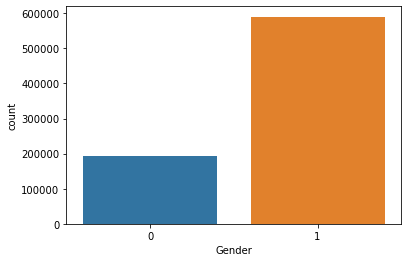

In [32]:
ax=sns.countplot(x="Gender",data=df)

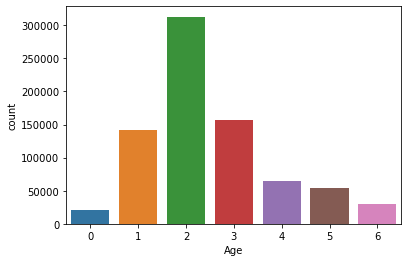

In [33]:
ax=sns.countplot(x="Age",data=df)

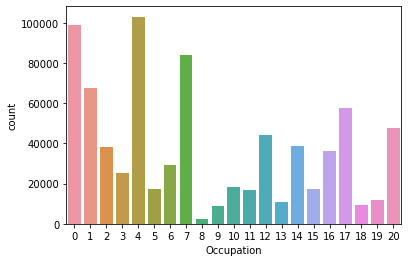

In [34]:
ax=sns.countplot(x="Occupation",data=df)

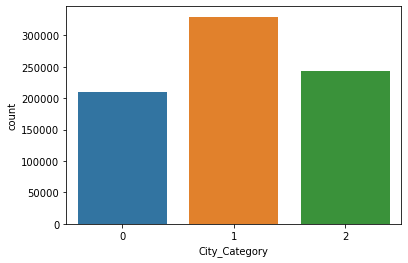

In [35]:
ax=sns.countplot(x="City_Category",data=df)

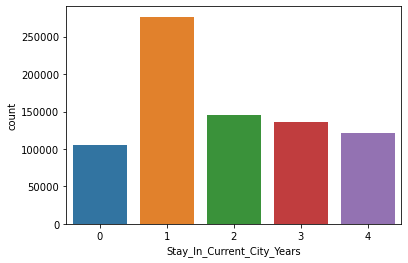

In [36]:
ax=sns.countplot(x="Stay_In_Current_City_Years",data=df)

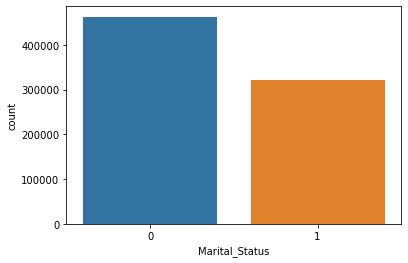

In [37]:
ax=sns.countplot(x="Marital_Status",data=df)

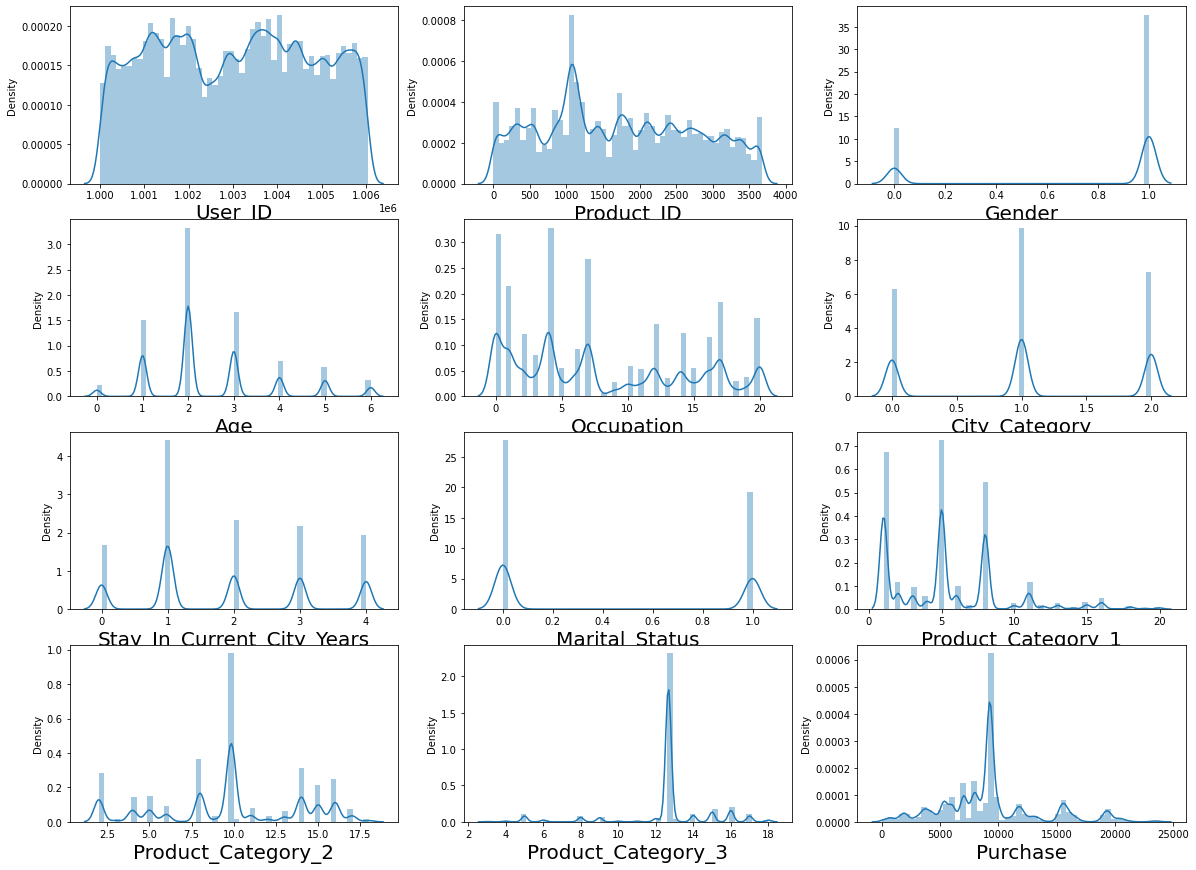

In [39]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        
    

In [38]:
df.shape

(783667, 12)

In [40]:
df.skew()

User_ID                       0.003011
Product_ID                    0.150259
Gender                       -1.172731
Age                           0.808914
Occupation                    0.399767
City_Category                -0.071390
Stay_In_Current_City_Years    0.318568
Marital_Status                0.366914
Product_Category_1            0.986594
Product_Category_2           -0.197919
Product_Category_3           -1.390412
Purchase                      0.716325
dtype: float64

In [41]:
# lets check the correlation

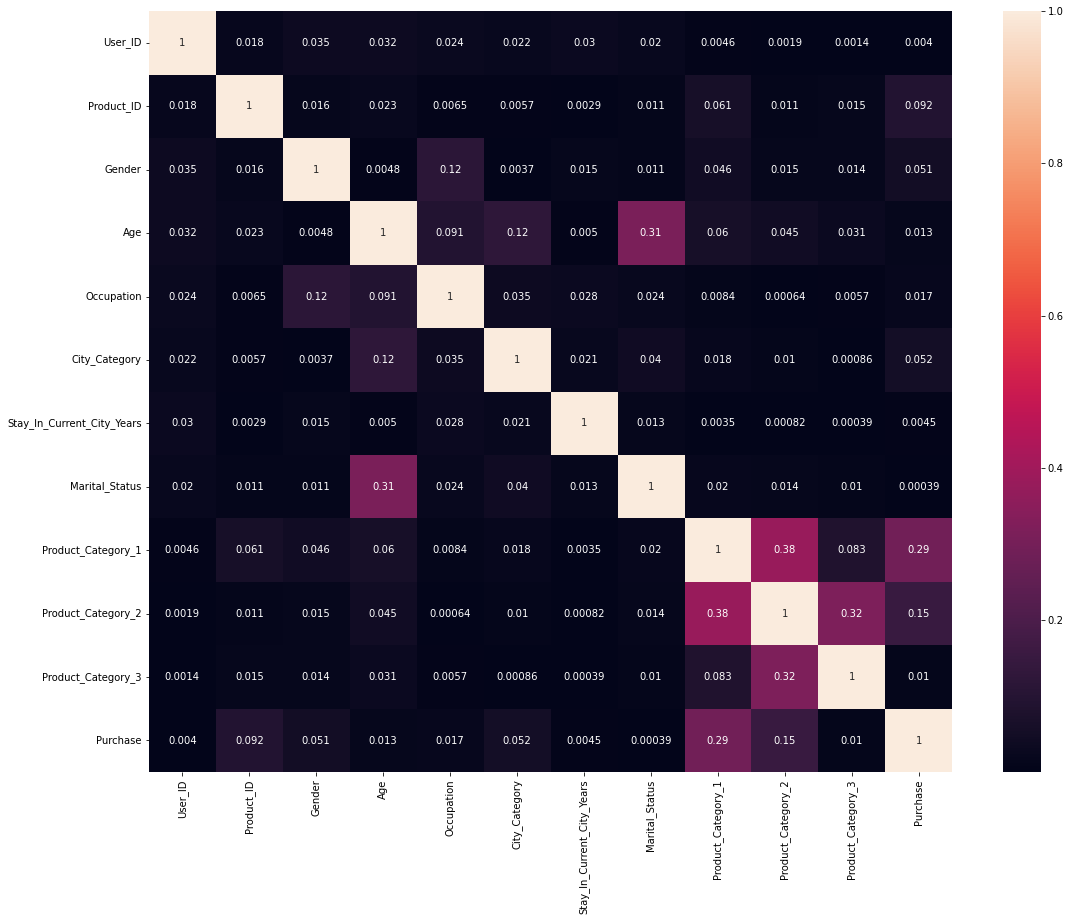

In [42]:
df_corr=df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [43]:
# as we can see that there is no such correlation between columns so we will keep all the colmns

In [44]:
# model building

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=df.drop('Purchase',axis=1)
y=df['Purchase']

In [48]:
lr=LinearRegression()

In [49]:
from sklearn.metrics import r2_score,accuracy_score

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"at random state {i},the training accuracy is {r2_score(y_train,pred_train)}")
print(f"at random state {i},the testing accuracy is {r2_score(y_test,pred_test)}")
print("\n")

at random state 99,the training accuracy is 0.09857919399174897
at random state 99,the testing accuracy is 0.09675522395601999




In [54]:
from sklearn. linear_model import Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score

In [59]:
from sklearn.ensemble import RandomForestRegressor